<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Imdb project</p>

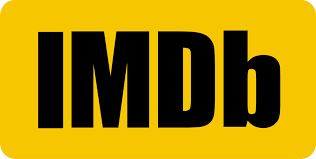

<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Libraries</p>

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Read data</p>

In [300]:
df = pd.read_csv('imdb_data.csv') 

<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">FIRST EDA </p>

In [438]:
def readable_columns(columns):
    return [re.sub(r'([a-z])([A-Z])', r'\1 \2', col).title() for col in columns]

display_columns = readable_columns(df.columns)

print("\n" + "="*50)
print("First Part of the Dataset:")
print("="*50)
print(tabulate(df_part1.head(), headers=display_columns[:7], tablefmt='grid', showindex=False))

print("\n" + "="*50)
print("Second Part of the Dataset:")
print("="*50)
print(tabulate(df_part2.head(), headers=display_columns[7:], tablefmt='grid', showindex=False))


First Part of the Dataset:
+-----------+-----------------+------------------+------------+-------------------+----------------------------+------------------+
| Id        | Primary Title   | Original Title   |   Is Adult |   Runtime Minutes | Genres                     |   Average Rating |
+===========+=================+==================+============+===================+============================+==================+
| tt0035423 | Kate & Leopold  | Kate & Leopold   |          0 |               118 | Comedy,Fantasy,Romance     |              6.4 |
+-----------+-----------------+------------------+------------+-------------------+----------------------------+------------------+
| tt0065421 | The Aristocats  | The AristoCats   |          0 |                78 | Adventure,Animation,Comedy |              7.1 |
+-----------+-----------------+------------------+------------+-------------------+----------------------------+------------------+
| tt0065938 | Kelly's Heroes  | Kelly's Heroes  

In [348]:
print("\n" + "="*50)
print("Dataset Info:")
print("="*50)

info_dict = {
    'Column Name': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Dtype': df.dtypes
}

print(tabulate(info_dict, headers='keys', tablefmt='grid'))


Dataset Info:
+----------------+------------------+---------+
| Column Name    |   Non-Null Count | Dtype   |
+================+==================+=========+
| id             |             3348 | object  |
+----------------+------------------+---------+
| primaryTitle   |             3348 | object  |
+----------------+------------------+---------+
| originalTitle  |             3348 | object  |
+----------------+------------------+---------+
| isAdult        |             3348 | int64   |
+----------------+------------------+---------+
| runtimeMinutes |             3348 | int64   |
+----------------+------------------+---------+
| genres         |             3348 | object  |
+----------------+------------------+---------+
| averageRating  |             3348 | float64 |
+----------------+------------------+---------+
| numVotes       |             3348 | int64   |
+----------------+------------------+---------+
| budget         |             3348 | object  |
+----------------+-------

In [350]:
print("\n" + "="*50)
print("Descriptive Statistics:")
print("="*50)
print(tabulate(df.describe().round(2), headers='keys', tablefmt='grid'))



Descriptive Statistics:
+-------+-----------+------------------+-----------------+------------------+
|       |   isAdult |   runtimeMinutes |   averageRating |         numVotes |
+=======+===========+==================+=================+==================+
| count |      3348 |          3348    |         3348    |   3348           |
+-------+-----------+------------------+-----------------+------------------+
| mean  |         0 |           112.74 |            6.74 | 215549           |
+-------+-----------+------------------+-----------------+------------------+
| std   |         0 |            19.93 |            0.88 | 248021           |
+-------+-----------+------------------+-----------------+------------------+
| min   |         0 |            63    |            1    |  50004           |
+-------+-----------+------------------+-----------------+------------------+
| 25%   |         0 |            98    |            6.2  |  78977           |
+-------+-----------+------------------

<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Unpopular Movie Genres: A Rating Perspective</p>

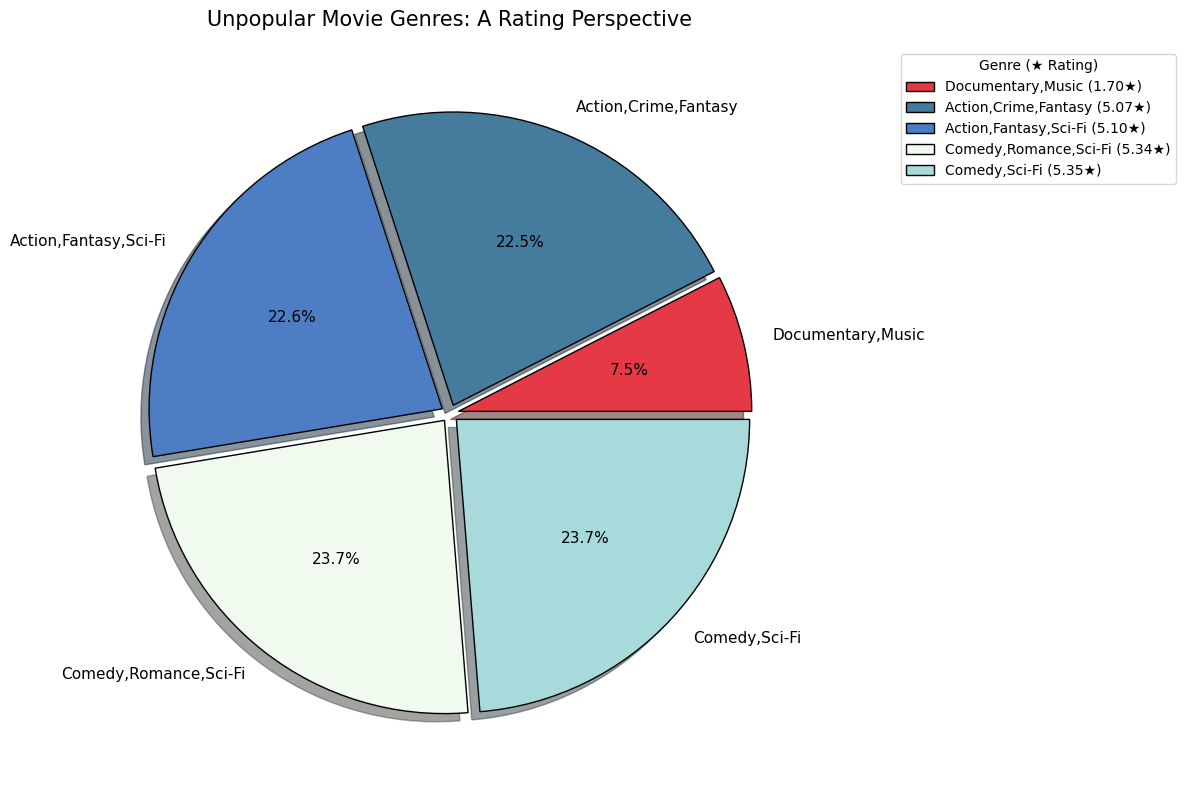

In [444]:
df_cleaned = df[['genres', 'averageRating', 'numVotes']].dropna()

df_cleaned['genres'] = df_cleaned['genres'].str.split('|')
df_cleaned = df_cleaned.explode('genres')

genre_analysis = df_cleaned.groupby('genres').agg(
    avg_rating=('averageRating', 'mean'),
    vote_count=('numVotes', 'mean')
).reset_index()

lowest_rated = genre_analysis.nsmallest(5, 'avg_rating')

plt.figure(figsize=(12, 8))
custom_colors = ['#E63946', '#457B9D', '#4d7ec4', '#F1FAEE', '#A8DADC']

plt.pie(
    lowest_rated['avg_rating'],
    labels=lowest_rated['genres'],
    autopct='%1.1f%%',
    colors=custom_colors,
    shadow=True,
    explode=[0.03] * 5,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Unpopular Movie Genres: A Rating Perspective', fontsize=15, pad=15)
plt.legend([f"{g} ({r:.2f}★)" for g, r in zip(lowest_rated['genres'], 
           lowest_rated['avg_rating'])],
           title='Genre (★ Rating)', 
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Ranking the Top 5 Directors by Ratings and Votes</p>

In [434]:

for column in ['averageRating', 'numVotes']:
    df[column] = pd.to_numeric(df[column], errors='coerce')
required_columns = ['directors', 'primaryTitle', 'averageRating', 'release_date', 'genres', 'numVotes']
df_clean = df.dropna(subset=required_columns)
director_best_movies = df_clean.loc[df_clean.groupby('directors')['averageRating'].idxmax()]
top_director_films = director_best_movies[required_columns].nlargest(5, ['numVotes', 'averageRating'])

column_alignments = {
    'directors': 'left',
    'primaryTitle': 'left',
    'averageRating': 'center',
    'numVotes': 'center',
    'release_date': 'left',
    'genres': 'left'
}

formatted_table = tabulate(
    top_director_films,
    headers='keys',
    tablefmt='fancy_grid',
    showindex=False,
    colalign=[column_alignments[col] for col in top_director_films.columns]
)


print("\n" + "="*30)
print("Ranking the Top 5 Directors:")
print("="*30)

print(formatted_table)


Ranking the Top 5 Directors:
╒═══════════════════╤══════════════════════════╤═════════════════╤════════════════════╤════════════════════╤════════════╕
│ directors         │ primaryTitle             │  averageRating  │ release_date       │ genres             │  numVotes  │
╞═══════════════════╪══════════════════════════╪═════════════════╪════════════════════╪════════════════════╪════════════╡
│ Frank Darabont    │ The Shawshank Redemption │       9.3       │ September 10, 1994 │ Drama              │  2817283   │
├───────────────────┼──────────────────────────┼─────────────────┼────────────────────┼────────────────────┼────────────┤
│ Christopher Nolan │ The Dark Knight          │        9        │ July 14, 2008      │ Action,Crime,Drama │  2798830   │
├───────────────────┼──────────────────────────┼─────────────────┼────────────────────┼────────────────────┼────────────┤
│ David Fincher     │ Fight Club               │       8.8       │ September 10, 1999 │ Drama              │  225220

<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Analyzing Movie Releases Over 5-Year Intervals</p>

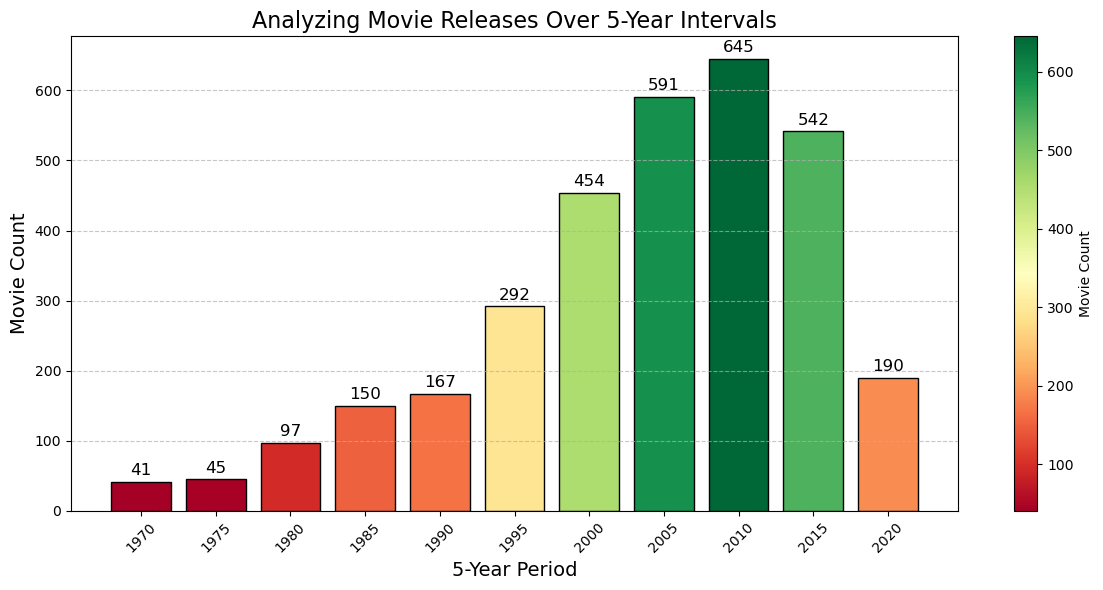

In [427]:
df['year_of_release'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['interval_group'] = (df['year_of_release'] // 5) * 5
movies_by_interval = df.groupby('interval_group').size().reset_index(name='movie_count')
intervals = movies_by_interval['interval_group']
movie_counts = movies_by_interval['movie_count']

min_count = min(movie_counts)
max_count = max(movie_counts)
norm = plt.Normalize(min_count, max_count)
colors = plt.cm.RdYlGn(norm(movie_counts))
fig, ax = plt.subplots(figsize=(12, 6))

bar_plot = ax.bar(intervals, movie_counts, color=colors, edgecolor='black', width=4)

for bar, count in zip(bar_plot, movie_counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,  
            str(int(count)), ha='center', va='bottom', fontsize=12)

ax.set_title('Analyzing Movie Releases Over 5-Year Intervals', fontsize=16)
ax.set_xlabel('5-Year Period', fontsize=14)
ax.set_ylabel('Movie Count', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(intervals)
ax.tick_params(axis='x', rotation=45)

sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Movie Count')

plt.tight_layout()
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">How Have Movie Runtimes Changed Over the Years?</p>

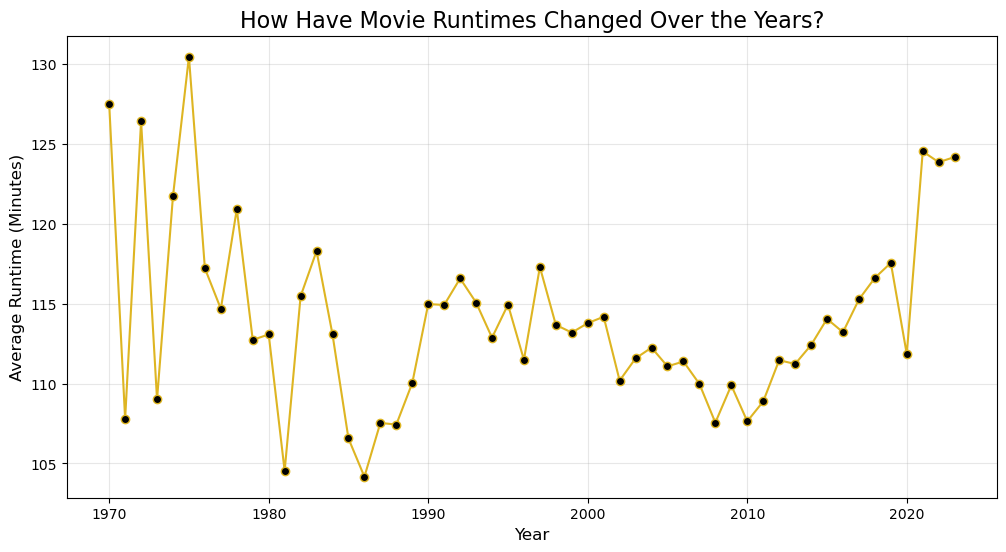

In [466]:
df2 = df[['release_date', 'runtimeMinutes']].dropna()
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce', format='%Y', exact=False)
df2['release_date'] = pd.to_datetime(df2['release_date'].astype(str), errors='coerce', format='%Y-%m-%d', exact=False)
df2['year'] = df2['release_date'].dt.year
average_runtime = df2.groupby('year')['runtimeMinutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(average_runtime['year'], average_runtime['runtimeMinutes'], 
         marker='o', color='#deb522', linestyle='-', 
         markerfacecolor='black', markeredgewidth=1)
plt.title("How Have Movie Runtimes Changed Over the Years?", fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Runtime (Minutes)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Does Runtime Affect a Movie's Rating</p>

Correlation between runtime and average rating: 0.36


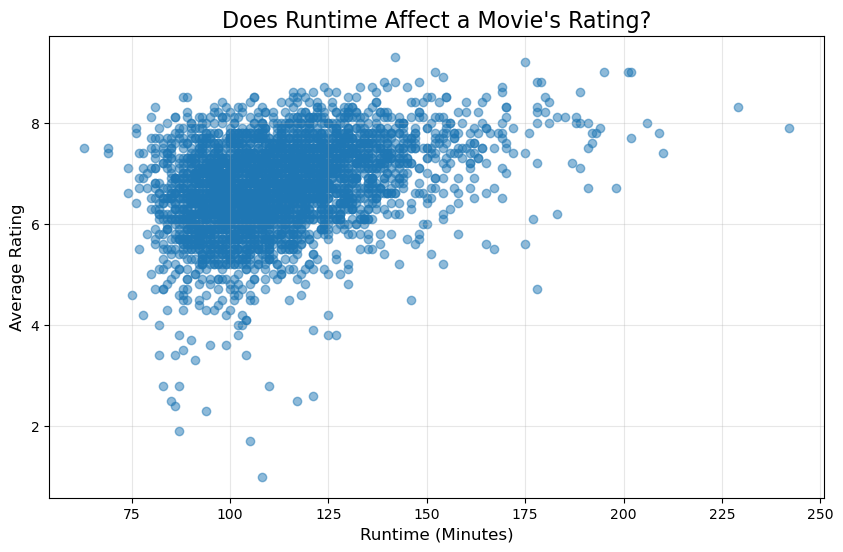

In [421]:
df_cleaned = df[['runtimeMinutes', 'averageRating']].dropna()

correlation = df_cleaned['runtimeMinutes'].corr(df_cleaned['averageRating'])
print(f'Correlation between runtime and average rating: {correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['runtimeMinutes'], df_cleaned['averageRating'], alpha=0.5)
plt.title("Does Runtime Affect a Movie's Rating?", fontsize=16)
plt.xlabel('Runtime (Minutes)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Influential Directors Who Shaped Cinema</p>

In [409]:
def get_best_movie_by_director(director_name):
    movies_by_director = df[df['directors'] == director_name]
    top_movie_details = movies_by_director.sort_values(by='averageRating', ascending=False).iloc[0]
    
    return top_movie_details['primaryTitle']

def get_best_movie_rating(director_name):
    movies_by_director = df[df['directors'] == director_name]
    top_movie_details = movies_by_director.sort_values(by='averageRating', ascending=False).iloc[0]
    
    return top_movie_details['averageRating']

director_movie_counts = df['directors'].value_counts().reset_index()
director_movie_counts.columns = ['Director', 'Movie Count']
top_directors = director_movie_counts.head(5)
directors_with_details = top_directors.copy()
directors_with_details['Top Movie'] = directors_with_details['Director'].apply(get_best_movie_by_director)
directors_with_details['Top Movie Rating'] = directors_with_details['Director'].apply(get_best_movie_rating)
formatted_table = tabulate(directors_with_details[['Director', 'Movie Count', 'Top Movie', 'Top Movie Rating']], 
                           headers='keys', tablefmt='pretty', showindex=False)


print("\n" + "="*45)
print("Influential Directors Who Shaped Cinema:")
print("="*45)
print(formatted_table)



Influential Directors Who Shaped Cinema:
+------------------+-------------+------------------+------------------+
|     Director     | Movie Count |    Top Movie     | Top Movie Rating |
+------------------+-------------+------------------+------------------+
| Steven Spielberg |     30      | Schindler's List |       9.0        |
|   Ridley Scott   |     23      |      Alien       |       8.5        |
| Martin Scorsese  |     21      |    Goodfellas    |       8.7        |
|  Clint Eastwood  |     20      |    Unforgiven    |       8.2        |
|    Ron Howard    |     19      | A Beautiful Mind |       8.2        |
+------------------+-------------+------------------+------------------+
